#### 抓取檔案路徑

In [1]:
import os
os.getcwd()

'D:\\python code\\財金自然語言處理中心\\七大類'

#### 引進所需套件

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### 引進所需營收資料

In [4]:
name_revenue = '2017單月營收2.xlsx'
file_revenue = pd.read_excel(name_revenue)

In [5]:
file_revenue.shape

(11388, 4)

In [6]:
file_revenue.head()

,公司,簡稱,年月,單月營收(千元)
0,1101,台泥,201702,5964991
1,1101,台泥,201703,9083111
2,1101,台泥,201704,8370478
3,1101,台泥,201705,8485032
4,1101,台泥,201706,7858569


#### 清理資料

In [7]:
df_revenue = file_revenue.drop(['簡稱'], axis=1)
df_revenue.head()

,公司,年月,單月營收(千元)
0,1101,201702,5964991
1,1101,201703,9083111
2,1101,201704,8370478
3,1101,201705,8485032
4,1101,201706,7858569


In [8]:
print(type(df_revenue.iloc[0,0]))
print(type(df_revenue.iloc[0,1]))
print(type(df_revenue.iloc[0,2]))

<class 'int'>
<class 'numpy.int64'>
<class 'numpy.int64'>


In [9]:
df_revenue = df_revenue.pivot(index='公司', columns='年月')
df_revenue.head()

單月營收(千元)                                                                 \
年月     201702   201703   201704   201705   201706   201707   201708   201709   
公司                                                                             
1101  5964991  9083111  8370478  8485032  7858569  8034396  6952639  8071192   
1102  3049461  5308954  5218646  5741517  5331442  5252149  5478165  5806573   
1103   171513   194614   132940   183810   143629   153905   174704   177734   
1104   308357   428434   358213   381948   318948   357742   367333   403016   
1108   232100   343552   292915   332953   243699   270234   293423   267312   

                                           
年月     201710   201711    201712   201801  
公司                                         
1101  8387381  9985897  10988149  9617393  
1102  5840273  6639248   7070625  6769986  
1103   167398   181868    181112   172094  
1104   336159   381565    399796   460482  
1108   259826   258913    291571   320340

In [10]:
df_revenue.info()

<class 'pandas.core.frame.DataFrame'>
Index: 949 entries, 1101 to Y9999  
Data columns (total 12 columns):
(單月營收(千元), 201702)    949 non-null int64
(單月營收(千元), 201703)    949 non-null int64
(單月營收(千元), 201704)    949 non-null int64
(單月營收(千元), 201705)    949 non-null int64
(單月營收(千元), 201706)    949 non-null int64
(單月營收(千元), 201707)    949 non-null int64
(單月營收(千元), 201708)    949 non-null int64
(單月營收(千元), 201709)    949 non-null int64
(單月營收(千元), 201710)    949 non-null int64
(單月營收(千元), 201711)    949 non-null int64
(單月營收(千元), 201712)    949 non-null int64
(單月營收(千元), 201801)    949 non-null int64
dtypes: int64(12)
memory usage: 96.4+ KB


#### 把三個月的營收加總成月營收 

In [11]:
df_rev_byQ = pd.DataFrame()
Q1 = df_revenue.iloc[:,0:3].sum(1)
Q2 = df_revenue.iloc[:,3:6].sum(1)
Q3 = df_revenue.iloc[:,6:9].sum(1)
Q4 = df_revenue.iloc[:,9:].sum(1)
df_rev_byQ['2017Q1'] = Q1
df_rev_byQ['2017Q2'] = Q2
df_rev_byQ['2017Q3'] = Q3
df_rev_byQ['2017Q4'] = Q4

df_rev_byQ.head()
# print(type((dfQ.index[0])))

,2017Q1,2017Q2,2017Q3,2017Q4
公司,,,,
1101,23418580,24377997,23411212,30591439
1102,13577061,16325108,17125011,20479859
1103,499067,481344,519836,535074
1104,1095004,1058638,1106508,1241843
1108,868567,846886,820561,870824


#### 取得季獲利成長率資料：把下一季除以上一季

In [12]:
df_rev_Qgrowth = pd.DataFrame()
df_rev_Qgrowth['REQ1-Q2'] = df_rev_byQ.iloc[:,1] / df_rev_byQ.iloc[:,0]
df_rev_Qgrowth['REQ2-Q3'] = df_rev_byQ.iloc[:,2] / df_rev_byQ.iloc[:,1]
df_rev_Qgrowth['REQ3-Q4'] = df_rev_byQ.iloc[:,3] / df_rev_byQ.iloc[:,2]

df_rev_Qgrowth.head()
# print((dfQgrowth.index))

,REQ1-Q2,REQ2-Q3,REQ3-Q4
公司,,,
1101,1.040968,0.960342,1.306700
1102,1.202404,1.048998,1.195903
1103,0.964488,1.079968,1.029313
1104,0.966789,1.045218,1.122308
1108,0.975038,0.968916,1.061254


#### 抓取應收帳款資料

In [14]:
name_AR = '2017上市公司應收帳款.xlsx'
file_AR = pd.read_excel(name_AR)
file_AR.head()

,公司,簡稱,年/月,M應收帳款及票據
0,1101,台泥,201703,19663454
1,1101,台泥,201706,20653913
2,1101,台泥,201709,22806321
3,1101,台泥,201712,27306164
4,1102,亞泥,201703,14086521


In [15]:
df_AR = file_AR.drop(['簡稱'], axis=1)
df_AR = df_AR.pivot(index='公司', columns='年/月')
df_AR.head()

M應收帳款及票據                                    
年/月       201703      201706      201709      201712
公司                                                  
1101  19663454.0  20653913.0  22806321.0  27306164.0
1102  14086521.0  14580025.0  16514884.0  18266303.0
1103    248670.0    167247.0    556467.0    206738.0
1104    935271.0    867790.0    928760.0   1012020.0
1108    693168.0    633502.0    605710.0    599362.0

In [16]:
df_AR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 924 entries, 1101 to 912398
Data columns (total 4 columns):
(M應收帳款及票據, 201703)    910 non-null float64
(M應收帳款及票據, 201706)    924 non-null float64
(M應收帳款及票據, 201709)    913 non-null float64
(M應收帳款及票據, 201712)    924 non-null float64
dtypes: float64(4)
memory usage: 36.1 KB


In [17]:
index_nullAR = df_AR.index[df_AR[('M應收帳款及票據', 201709)].isnull() == True]

In [18]:
index_nullAR

Int64Index([9103, 9136, 9157, 9188, 910322, 910482, 910708, 910861, 911868,
            912000, 912398],
           dtype='int64', name='公司')

In [19]:
#把含有空值的資料丟掉
df_AR = df_AR.drop(index_nullAR)

In [20]:
df_AR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 913 entries, 1101 to 911622
Data columns (total 4 columns):
(M應收帳款及票據, 201703)    909 non-null float64
(M應收帳款及票據, 201706)    913 non-null float64
(M應收帳款及票據, 201709)    913 non-null float64
(M應收帳款及票據, 201712)    913 non-null float64
dtypes: float64(4)
memory usage: 35.7 KB


In [21]:
#把含有0的資料丟掉
index_0AR = df_AR.index[df_AR[('M應收帳款及票據', 201703)] == 0]

In [22]:
index_0AR

Int64Index([9110, 911616], dtype='int64', name='公司')

In [23]:
df_AR = df_AR.drop(index_0AR)

#### 取得應收帳款季成長率：下一季除以上一季

In [24]:
df_AR_Qgrowth = pd.DataFrame()
df_AR_Qgrowth['ARQ1-Q2'] = df_AR.iloc[:,1] / df_AR.iloc[:,0]
df_AR_Qgrowth['ARQ2-Q3'] = df_AR.iloc[:,2] / df_AR.iloc[:,1]
df_AR_Qgrowth['ARQ3-Q4'] = df_AR.iloc[:,3] / df_AR.iloc[:,2]

df_AR_Qgrowth.head()

,ARQ1-Q2,ARQ2-Q3,ARQ3-Q4
公司,,,
1101,1.050371,1.104213,1.197307
1102,1.035034,1.132706,1.106051
1103,0.672566,3.327217,0.371519
1104,0.927849,1.070259,1.089646
1108,0.913923,0.956130,0.989520


#### 抓取季現金資料

In [26]:
name_Cash = '上市公司季現金累計.xlsx'
file_Cash = pd.read_excel(name_Cash)
file_Cash.head()

,公司,簡稱,年/月,M現金及約當現金
0,1101,台泥,201703,25012886
1,1101,台泥,201706,25529191
2,1101,台泥,201709,26608300
3,1101,台泥,201712,26331218
4,1102,亞泥,201703,9575355


In [27]:
df_Cash_byQ = file_Cash.drop(['簡稱'], axis=1)
df_Cash_byQ = df_Cash_byQ.pivot(index='公司', columns='年/月')
df_Cash_byQ.head()

M現金及約當現金                                    
年/月       201703      201706      201709      201712
公司                                                  
1101  25012886.0  25529191.0  26608300.0  26331218.0
1102   9575355.0   9800773.0   7620224.0   7739492.0
1103   1338589.0   1012750.0   1084896.0   1803189.0
1104    302805.0    257031.0    268885.0    192742.0
1108    179826.0    215715.0    177918.0    251893.0

#### 清理資料 

In [28]:
index_nullcash = df_Cash_byQ.index[df_Cash_byQ[('M現金及約當現金', 201703)].isnull() == True]

In [29]:
index_nullcash

Int64Index([3711, 4961], dtype='int64', name='公司')

In [30]:
df_Cash_byQ = df_Cash_byQ.drop(index_nullcash)

In [31]:
df_Cash_byQ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 765 entries, 1101 to 6192
Data columns (total 4 columns):
(M現金及約當現金, 201703)    765 non-null float64
(M現金及約當現金, 201706)    765 non-null float64
(M現金及約當現金, 201709)    765 non-null float64
(M現金及約當現金, 201712)    765 non-null float64
dtypes: float64(4)
memory usage: 29.9 KB


In [32]:
df_Cash_Qgrowth = pd.DataFrame()
df_Cash_Qgrowth['CAQ1-Q2'] = df_Cash_byQ.iloc[:,1] / df_Cash_byQ.iloc[:,0]
df_Cash_Qgrowth['CAQ2-Q3'] = df_Cash_byQ.iloc[:,2] / df_Cash_byQ.iloc[:,1]
df_Cash_Qgrowth['CAQ3-Q4'] = df_Cash_byQ.iloc[:,3] / df_Cash_byQ.iloc[:,2]

df_Cash_Qgrowth.head()

,CAQ1-Q2,CAQ2-Q3,CAQ3-Q4
公司,,,
1101,1.020642,1.042270,0.989587
1102,1.023541,0.777513,1.015652
1103,0.756580,1.071238,1.662085
1104,0.848833,1.046119,0.716819
1108,1.199576,0.824783,1.415781


#### 抓取自由現金和營運現金

In [33]:
nameCFree = '2017自由現金營運現金上市公司1.xlsx'
fileCFree = pd.read_excel(nameCFree)
fileCFree.head()

,公司,簡稱,年/月,M來自營運之現金流量,M自由現金流量
0,1101,台泥,201703,1408140,4582468
1,1101,台泥,201706,4616823,14096516
2,1101,台泥,201709,7091678,13526188
3,1101,台泥,201712,12310560,10515704
4,1102,亞泥,201703,-282365,7709780


In [34]:
df_FreeCash_OperatingCash = fileCFree.drop(['簡稱'], axis=1)
df_FreeCash_OperatingCash.head()

,公司,年/月,M來自營運之現金流量,M自由現金流量
0,1101,201703,1408140,4582468
1,1101,201706,4616823,14096516
2,1101,201709,7091678,13526188
3,1101,201712,12310560,10515704
4,1102,201703,-282365,7709780


In [35]:
df_FreeCash_OperatingCash.head()

,公司,年/月,M來自營運之現金流量,M自由現金流量
0,1101,201703,1408140,4582468
1,1101,201706,4616823,14096516
2,1101,201709,7091678,13526188
3,1101,201712,12310560,10515704
4,1102,201703,-282365,7709780


In [36]:
df_FreeCash_OperatingCash = df_FreeCash_OperatingCash.pivot(index='公司', columns='年/月')

In [37]:
index_null_free = df_FreeCash_OperatingCash.index[df_FreeCash_OperatingCash[('M自由現金流量', 201703)].isnull() == True]

In [38]:
index_null_free

Int64Index([4961, 6666, 9157, 910482, 910861, 912000, 912398], dtype='int64', name='公司')

In [39]:
index_null_operating = df_FreeCash_OperatingCash.index[df_FreeCash_OperatingCash[('M來自營運之現金流量', 201703)].isnull() == True]

In [40]:
index_null_operating

Int64Index([4961, 6666, 9157, 910482, 910861, 912000, 912398], dtype='int64', name='公司')

In [41]:
df_FreeCash_OperatingCash = df_FreeCash_OperatingCash.drop(index_null_free)

In [42]:
df_FreeCash_OperatingCash.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 1101 to 911622
Data columns (total 8 columns):
(M來自營運之現金流量, 201703)    887 non-null float64
(M來自營運之現金流量, 201706)    887 non-null float64
(M來自營運之現金流量, 201709)    886 non-null float64
(M來自營運之現金流量, 201712)    887 non-null float64
(M自由現金流量, 201703)       887 non-null float64
(M自由現金流量, 201706)       887 non-null float64
(M自由現金流量, 201709)       886 non-null float64
(M自由現金流量, 201712)       887 non-null float64
dtypes: float64(8)
memory usage: 62.4 KB


In [43]:
df_FreeCash_OperatingCash = df_FreeCash_OperatingCash.drop(df_FreeCash_OperatingCash.index[df_FreeCash_OperatingCash['M自由現金流量',201703] == 0])

In [44]:
df_FreeCash_OperatingCash.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 1101 to 911622
Data columns (total 8 columns):
(M來自營運之現金流量, 201703)    884 non-null float64
(M來自營運之現金流量, 201706)    884 non-null float64
(M來自營運之現金流量, 201709)    883 non-null float64
(M來自營運之現金流量, 201712)    884 non-null float64
(M自由現金流量, 201703)       884 non-null float64
(M自由現金流量, 201706)       884 non-null float64
(M自由現金流量, 201709)       883 non-null float64
(M自由現金流量, 201712)       884 non-null float64
dtypes: float64(8)
memory usage: 62.2 KB


In [45]:
df_FreeCash_OperatingCash = df_FreeCash_OperatingCash.drop(df_FreeCash_OperatingCash.index[df_FreeCash_OperatingCash['M自由現金流量',201703].isnull() == True])

In [46]:
df_FreeCash_OperatingCash.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 1101 to 911622
Data columns (total 8 columns):
(M來自營運之現金流量, 201703)    884 non-null float64
(M來自營運之現金流量, 201706)    884 non-null float64
(M來自營運之現金流量, 201709)    883 non-null float64
(M來自營運之現金流量, 201712)    884 non-null float64
(M自由現金流量, 201703)       884 non-null float64
(M自由現金流量, 201706)       884 non-null float64
(M自由現金流量, 201709)       883 non-null float64
(M自由現金流量, 201712)       884 non-null float64
dtypes: float64(8)
memory usage: 62.2 KB


#### 計算自由現金 營運現金成長率：用下一季除以上一季 

In [47]:
df_operatingcash_growth = pd.DataFrame()
df_operatingcash_growth['COQ1-Q2'] = df_FreeCash_OperatingCash.iloc[:,1] / df_FreeCash_OperatingCash.iloc[:,0]
df_operatingcash_growth['COQ2-Q3'] = df_FreeCash_OperatingCash.iloc[:,2] / df_FreeCash_OperatingCash.iloc[:,1]
df_operatingcash_growth['COQ3-Q4'] = df_FreeCash_OperatingCash.iloc[:,3] / df_FreeCash_OperatingCash.iloc[:,2]
df_operatingcash_growth.head()

,COQ1-Q2,COQ2-Q3,COQ3-Q4
公司,,,
1101,3.278668,1.536052,1.735916
1102,-3.123100,4.369946,2.112034
1103,1.290143,0.787653,0.964679
1104,8.572374,5.118333,0.946415
1108,-13.388250,0.171391,3.469495


In [48]:
df_FreeCash_growth = pd.DataFrame()
df_FreeCash_growth['CFQ1-Q2'] = df_FreeCash_OperatingCash.iloc[:,5] / df_FreeCash_OperatingCash.iloc[:,4]
df_FreeCash_growth['CFQ2-Q3'] = df_FreeCash_OperatingCash.iloc[:,6] / df_FreeCash_OperatingCash.iloc[:,5]
df_FreeCash_growth['CFQ3-Q4'] = df_FreeCash_OperatingCash.iloc[:,7] / df_FreeCash_OperatingCash.iloc[:,6]
df_FreeCash_growth.head()

,CFQ1-Q2,CFQ2-Q3,CFQ3-Q4
公司,,,
1101,3.076184,0.959541,0.777433
1102,1.755318,1.008165,1.147959
1103,1.708270,0.909442,1.807377
1104,5.392883,1.422127,1.109129
1108,0.467672,1.147725,2.641682


In [49]:
df_FreeCash_growth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 884 entries, 1101 to 911622
Data columns (total 3 columns):
CFQ1-Q2    884 non-null float64
CFQ2-Q3    883 non-null float64
CFQ3-Q4    883 non-null float64
dtypes: float64(3)
memory usage: 27.6 KB


#### 抓取上市公司七大類別資料

In [51]:
nameclass1 = 'class1.xlsx'
fileclass1 = pd.read_excel(nameclass1)
fileclass1['class'] = '1'
# fileclass1.head()
nameclass2 = 'class2.xlsx'
fileclass2 = pd.read_excel(nameclass2)
fileclass2['class'] = '2'
# fileclass2.head()
nameclass3 = 'class3.xlsx'
fileclass3 = pd.read_excel(nameclass3)
fileclass3['class'] = '3'
# fileclass3.head()
nameclass4 = 'class4.xlsx'
fileclass4 = pd.read_excel(nameclass4)
fileclass4['class'] = '4'
# fileclass4.head()
nameclass5 = 'class5.xlsx'
fileclass5 = pd.read_excel(nameclass5)
fileclass5['class'] = '5'
# fileclass5.head()
nameclass6 = 'class6.xlsx'
fileclass6 = pd.read_excel(nameclass6)
fileclass6['class'] = '6'
# fileclass6.head()
nameclass7 = 'class7.xlsx'
fileclass7 = pd.read_excel(nameclass7)
fileclass7['class'] = '7'
# fileclass7.head()

frames = [fileclass1, fileclass2, fileclass3, fileclass4, fileclass5, fileclass6, fileclass7]
dfclass = pd.concat(frames, ignore_index=True)
dfclass.head()



,公司,簡稱,class
0,1216,統一,1
1,2049,上銀,1
2,2303,聯電,1
3,2408,南亞科,1
4,2618,長榮航,1


In [52]:
df_class = dfclass.set_index('公司')

In [53]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864 entries, 1216 to 9958
Data columns (total 2 columns):
簡稱       864 non-null object
class    864 non-null object
dtypes: object(2)
memory usage: 20.2+ KB


#### 抓取稅前息前淨利資料

In [54]:
name_income = '2017稅前息前淨利.xlsx'
file_income = pd.read_excel(name_income)
file_income.info() #資料極度不齊全

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 4 columns):
公司        1133 non-null object
簡稱        1133 non-null object
年/月       1133 non-null int64
稅前息前淨利    1133 non-null object
dtypes: int64(1), object(3)
memory usage: 35.5+ KB


#### 分析1：自由現金對公布獲利

In [55]:
df_rev_and_freecash = pd.concat([df_FreeCash_growth, df_rev_Qgrowth, df_class], axis=1)

In [56]:
df_rev_and_freecash.head()

,CFQ1-Q2,CFQ2-Q3,CFQ3-Q4,REQ1-Q2,REQ2-Q3,REQ3-Q4,簡稱,class
公司,,,,,,,,
1101,3.076184,0.959541,0.777433,1.040968,0.960342,1.306700,台泥,3
1102,1.755318,1.008165,1.147959,1.202404,1.048998,1.195903,亞泥,2
1103,1.708270,0.909442,1.807377,0.964488,1.079968,1.029313,嘉泥,4
1104,5.392883,1.422127,1.109129,0.966789,1.045218,1.122308,環泥,5
1108,0.467672,1.147725,2.641682,0.975038,0.968916,1.061254,幸福,2


#### 比率：自由現金成長率除以營收季成長率 

In [57]:
df_rev_and_freecash['R1'] = df_rev_and_freecash['CFQ1-Q2'] / df_rev_and_freecash['REQ1-Q2']
df_rev_and_freecash['R2'] = df_rev_and_freecash['CFQ2-Q3'] / df_rev_and_freecash['REQ2-Q3']
df_rev_and_freecash['R3'] = df_rev_and_freecash['CFQ3-Q4'] / df_rev_and_freecash['REQ3-Q4']

In [58]:
df_rev_and_freecash.head()

,CFQ1-Q2,CFQ2-Q3,CFQ3-Q4,REQ1-Q2,REQ2-Q3,REQ3-Q4,簡稱,class,R1,R2,R3
公司,,,,,,,,,,,
1101,3.076184,0.959541,0.777433,1.040968,0.960342,1.306700,台泥,3,2.955118,0.999166,0.594959
1102,1.755318,1.008165,1.147959,1.202404,1.048998,1.195903,亞泥,2,1.459841,0.961074,0.959910
1103,1.708270,0.909442,1.807377,0.964488,1.079968,1.029313,嘉泥,4,1.771168,0.842101,1.755906
1104,5.392883,1.422127,1.109129,0.966789,1.045218,1.122308,環泥,5,5.578137,1.360603,0.988257
1108,0.467672,1.147725,2.641682,0.975038,0.968916,1.061254,幸福,2,0.479645,1.184546,2.489207


#### 使用比率來畫圖，並觀察七大類別中比率的分布

In [59]:
df_rev_and_freecash_fordraw = df_rev_and_freecash.iloc[:,7:]

In [60]:
df_rev_and_freecash_fordraw.head()

,class,R1,R2,R3
公司,,,,
1101,3,2.955118,0.999166,0.594959
1102,2,1.459841,0.961074,0.959910
1103,4,1.771168,0.842101,1.755906
1104,5,5.578137,1.360603,0.988257
1108,2,0.479645,1.184546,2.489207


In [61]:
df_fordraw1 = df_rev_and_freecash_fordraw.pivot_table(index='公司', columns='class', values='R1')

In [62]:
df_fordraw2 = df_rev_and_freecash_fordraw.pivot_table(index='公司', columns='class', values='R2')

In [63]:
df_fordraw3 = df_rev_and_freecash_fordraw.pivot_table(index='公司', columns='class', values='R3')

Text(0.5, 0.98, 'FreeCash growth/Quarter revenue growth1')

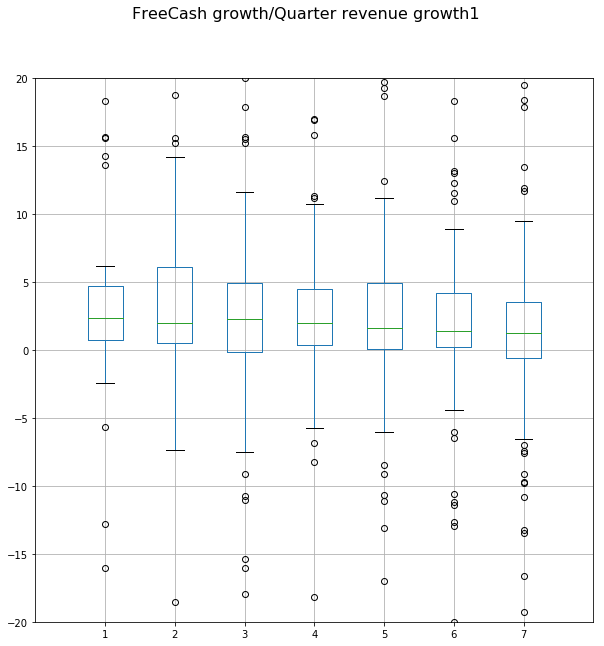

In [66]:
df_fordraw1.boxplot(figsize=(10,10))
plt.axis([0, 8, -20, 20])
plt.suptitle('FreeCash growth/Quarter revenue growth1', fontsize=16)

Text(0.5, 0.98, 'FreeCash growth/Quarter revenue growth2')

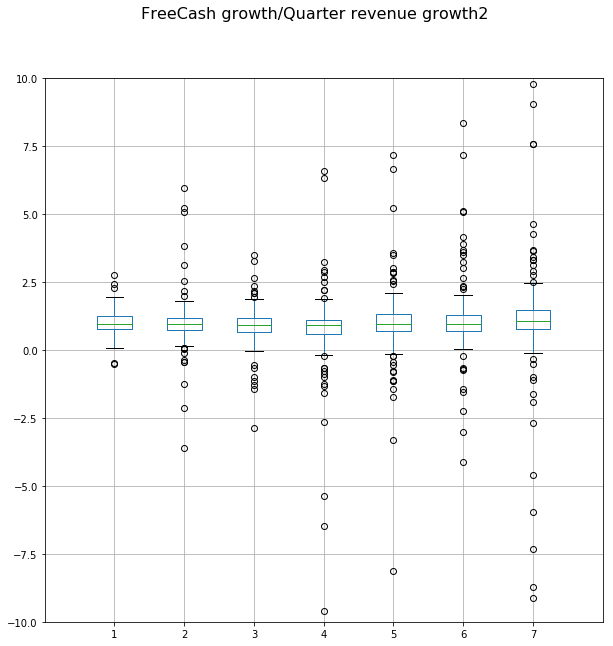

In [67]:
df_fordraw2.boxplot(figsize=(10,10))
plt.axis([0, 8, -10, 10])
plt.suptitle('FreeCash growth/Quarter revenue growth2', fontsize=16)

Text(0.5, 0.98, 'FreeCash growth/Quarter revenue growth')

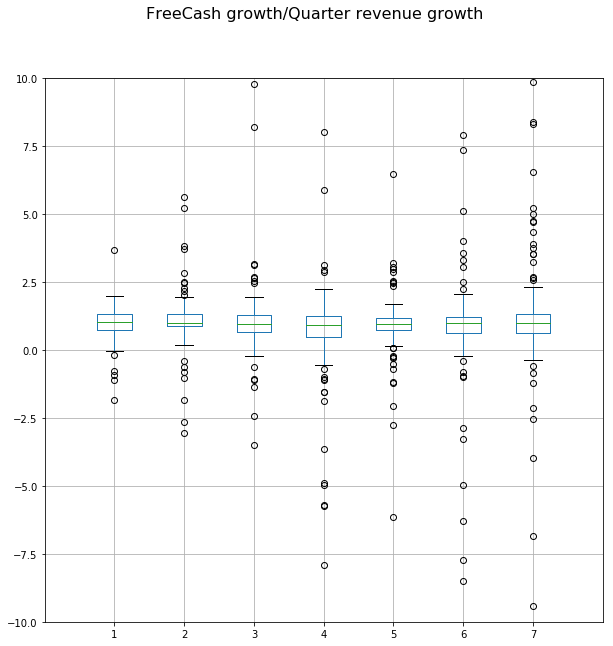

In [88]:
df_fordraw3.boxplot(figsize=(10,10))
plt.axis([0, 8, -10, 10])
plt.suptitle('FreeCash growth/Quarter revenue growth', fontsize=16)

發現第一類的資料有比其他組更集中的趨勢。

箱型圖意義：

這組數據顯示出：

最小值(minimum)

下四分位數(Q1)

中位數(Med --也就是Q2)

上四分位數(Q3)

最大值(maximum )

無平均值

四分位間距(interquartile range)= (Q3-Q1) (即ΔQ)

在區間 Q3+1.5ΔQ, Q1-1.5ΔQ 之外的值被視為應忽略(farout)。

farout: 在圖上不予顯示，僅標註一個符號∇。

最大值區間： Q3+1.5ΔQ

最小值區間： Q1-1.5ΔQ

最大值與最小值產生於這個區間。區間外的值被視為outlier顯示在圖上.

mild outlier （離群值) 

extreme outlier (極端值) 

#### 分析2：營運現金對營收

In [69]:
df_rev_and_opercash = pd.concat([df_operatingcash_growth, df_rev_Qgrowth, df_class], axis=1)

In [70]:
df_rev_and_opercash.head()

,COQ1-Q2,COQ2-Q3,COQ3-Q4,REQ1-Q2,REQ2-Q3,REQ3-Q4,簡稱,class
公司,,,,,,,,
1101,3.278668,1.536052,1.735916,1.040968,0.960342,1.306700,台泥,3
1102,-3.123100,4.369946,2.112034,1.202404,1.048998,1.195903,亞泥,2
1103,1.290143,0.787653,0.964679,0.964488,1.079968,1.029313,嘉泥,4
1104,8.572374,5.118333,0.946415,0.966789,1.045218,1.122308,環泥,5
1108,-13.388250,0.171391,3.469495,0.975038,0.968916,1.061254,幸福,2


In [71]:
df_rev_and_opercash['R1'] = df_rev_and_opercash['COQ1-Q2'] / df_rev_and_opercash['REQ1-Q2']
df_rev_and_opercash['R2'] = df_rev_and_opercash['COQ2-Q3'] / df_rev_and_opercash['REQ2-Q3']
df_rev_and_opercash['R3'] = df_rev_and_opercash['COQ3-Q4'] / df_rev_and_opercash['REQ3-Q4']

In [72]:
df_rev_and_opercash.head()

,COQ1-Q2,COQ2-Q3,COQ3-Q4,REQ1-Q2,REQ2-Q3,REQ3-Q4,簡稱,class,R1,R2,R3
公司,,,,,,,,,,,
1101,3.278668,1.536052,1.735916,1.040968,0.960342,1.306700,台泥,3,3.149633,1.599484,1.328473
1102,-3.123100,4.369946,2.112034,1.202404,1.048998,1.195903,亞泥,2,-2.597380,4.165827,1.766057
1103,1.290143,0.787653,0.964679,0.964488,1.079968,1.029313,嘉泥,4,1.337646,0.729330,0.937206
1104,8.572374,5.118333,0.946415,0.966789,1.045218,1.122308,環泥,5,8.866849,4.896902,0.843276
1108,-13.388250,0.171391,3.469495,0.975038,0.968916,1.061254,幸福,2,-13.731001,0.176890,3.269240


In [73]:
df_fordraw2_1 = df_rev_and_opercash.iloc[:,7:]
df_fordraw2_1.head()

,class,R1,R2,R3
公司,,,,
1101,3,3.149633,1.599484,1.328473
1102,2,-2.597380,4.165827,1.766057
1103,4,1.337646,0.729330,0.937206
1104,5,8.866849,4.896902,0.843276
1108,2,-13.731001,0.176890,3.269240


In [74]:
df_fordraw2_2 = df_fordraw2_1.pivot_table(index='公司', columns='class', values='R1')
df_fordraw2_2.head()

class,1,2,3,4,5,6,7
公司,,,,,,,
1101,NaN,NaN,3.149633,NaN,NaN,NaN,NaN
1102,NaN,-2.597380,NaN,NaN,NaN,NaN,NaN
1103,NaN,NaN,NaN,1.337646,NaN,NaN,NaN
1104,NaN,NaN,NaN,NaN,8.866849,NaN,NaN
1108,NaN,-13.731001,NaN,NaN,NaN,NaN,NaN


In [75]:
df_fordraw2_3 = df_fordraw2_1.pivot_table(index='公司', columns='class', values='R2')
df_fordraw2_2.head()

class,1,2,3,4,5,6,7
公司,,,,,,,
1101,NaN,NaN,3.149633,NaN,NaN,NaN,NaN
1102,NaN,-2.597380,NaN,NaN,NaN,NaN,NaN
1103,NaN,NaN,NaN,1.337646,NaN,NaN,NaN
1104,NaN,NaN,NaN,NaN,8.866849,NaN,NaN
1108,NaN,-13.731001,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0.98, 'OperatingCash growth/Quarter revenue growth1')

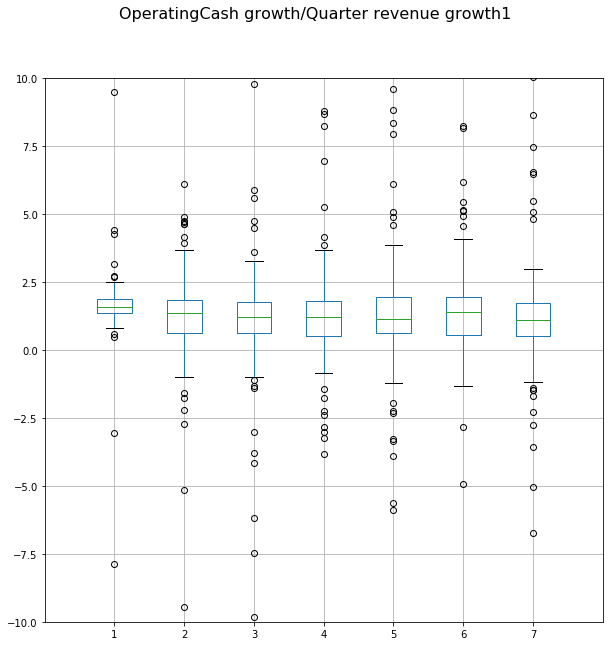

In [77]:
df_fordraw2_3.boxplot(figsize=(10,10))
plt.axis([0, 8, -10, 10])
plt.suptitle('OperatingCash growth/Quarter revenue growth', fontsize=16)

Text(0.5, 0.98, 'OperatingCash growth/Quarter revenue growth2')

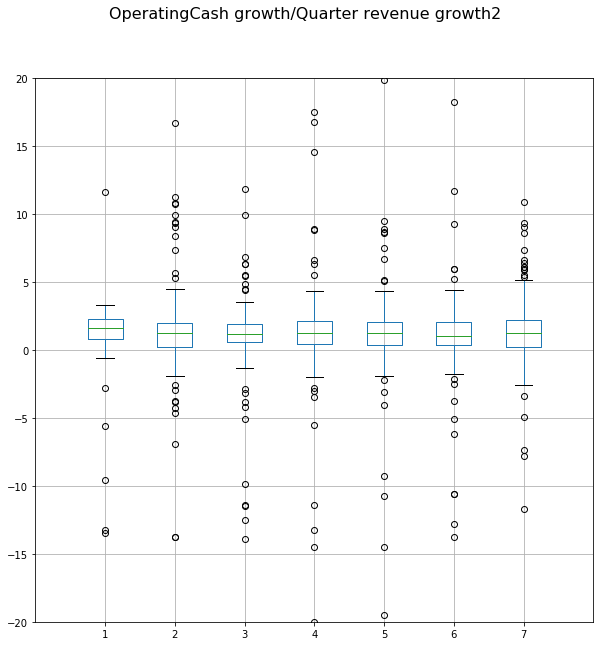

In [78]:
df_fordraw2_2.boxplot(figsize=(10,10))
plt.axis([0, 8, -20, 20])
plt.suptitle('OperatingCash growth/Quarter revenue growth2', fontsize=16)

#### 分析3：應收帳款及營收

In [79]:
df_rev_and_AR = pd.concat([df_AR_Qgrowth, df_rev_Qgrowth, df_class], axis=1)

In [80]:
df_rev_and_AR.head()

,ARQ1-Q2,ARQ2-Q3,ARQ3-Q4,REQ1-Q2,REQ2-Q3,REQ3-Q4,簡稱,class
公司,,,,,,,,
1101,1.050371,1.104213,1.197307,1.040968,0.960342,1.306700,台泥,3
1102,1.035034,1.132706,1.106051,1.202404,1.048998,1.195903,亞泥,2
1103,0.672566,3.327217,0.371519,0.964488,1.079968,1.029313,嘉泥,4
1104,0.927849,1.070259,1.089646,0.966789,1.045218,1.122308,環泥,5
1108,0.913923,0.956130,0.989520,0.975038,0.968916,1.061254,幸福,2


In [81]:
df_rev_and_AR['R1'] = df_rev_and_AR['ARQ1-Q2'] / df_rev_and_AR['REQ1-Q2']
df_rev_and_AR['R2'] = df_rev_and_AR['ARQ2-Q3'] / df_rev_and_AR['REQ2-Q3']
df_rev_and_AR['R3'] = df_rev_and_AR['ARQ3-Q4'] / df_rev_and_AR['REQ3-Q4']

In [82]:
df_rev_and_AR.head()

,ARQ1-Q2,ARQ2-Q3,ARQ3-Q4,REQ1-Q2,REQ2-Q3,REQ3-Q4,簡稱,class,R1,R2,R3
公司,,,,,,,,,,,
1101,1.050371,1.104213,1.197307,1.040968,0.960342,1.306700,台泥,3,1.009032,1.149812,0.916283
1102,1.035034,1.132706,1.106051,1.202404,1.048998,1.195903,亞泥,2,0.860804,1.079798,0.924866
1103,0.672566,3.327217,0.371519,0.964488,1.079968,1.029313,嘉泥,4,0.697330,3.080848,0.360939
1104,0.927849,1.070259,1.089646,0.966789,1.045218,1.122308,環泥,5,0.959722,1.023957,0.970898
1108,0.913923,0.956130,0.989520,0.975038,0.968916,1.061254,幸福,2,0.937320,0.986804,0.932406


In [83]:
df_fordraw3_1 = df_rev_and_AR.iloc[:,7:]
df_fordraw3_1.head()

,class,R1,R2,R3
公司,,,,
1101,3,1.009032,1.149812,0.916283
1102,2,0.860804,1.079798,0.924866
1103,4,0.697330,3.080848,0.360939
1104,5,0.959722,1.023957,0.970898
1108,2,0.937320,0.986804,0.932406


In [84]:
df_fordraw3_2 = df_fordraw2_1.pivot_table(index='公司', columns='class', values='R1')
df_fordraw3_2.head()

class,1,2,3,4,5,6,7
公司,,,,,,,
1101,NaN,NaN,3.149633,NaN,NaN,NaN,NaN
1102,NaN,-2.597380,NaN,NaN,NaN,NaN,NaN
1103,NaN,NaN,NaN,1.337646,NaN,NaN,NaN
1104,NaN,NaN,NaN,NaN,8.866849,NaN,NaN
1108,NaN,-13.731001,NaN,NaN,NaN,NaN,NaN


Text(0.5, 0.98, 'Account Receivables growth/Quarter revenue growth')

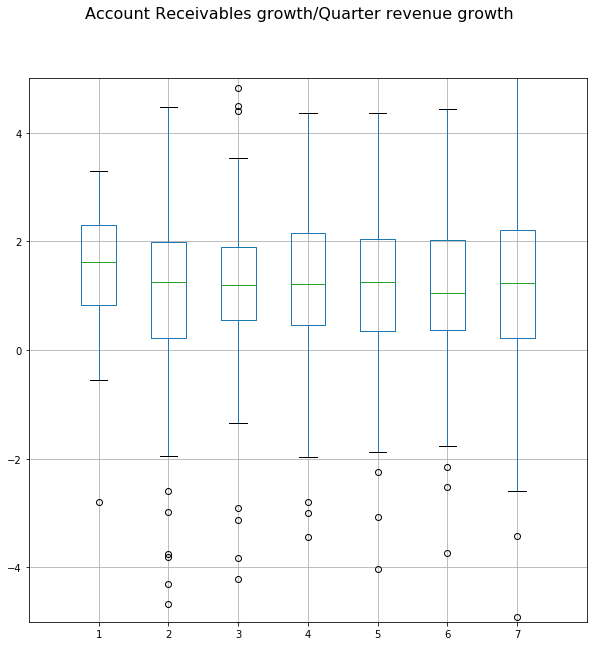

In [87]:
df_fordraw3_2.boxplot(figsize=(10,10))
plt.axis([0, 8, -5, 5])
plt.suptitle('Account Receivables growth/Quarter revenue growth', fontsize=16)

In [95]:
number = [int(w) for w in input().split(" ")]
square = [ i*i for i in range(0, number[1]) if number [0] <= i*i <= number[1]]


print(square)
print(len(square))

99 400
[100, 121, 144, 169, 196, 225, 256, 289, 324, 361, 400]
11
